# <center>Titanic Survivors Prediction with One Feature</center>
### <center>by Bon Crowder</center>

***
<a id='top'></a>

## Preliminary Code

Here are the dependencies:

In [ ]:
import pandas as pd
import numpy as np
import sklearn

And these are my personal prettifiers (not required): 

In [ ]:
pd.options.display.float_format = lambda x: f' {x:,.2f}'
import warnings
warnings.filterwarnings("ignore")

## Load the _Titanic_ Dataset

In [ ]:
titanic = pd.read_csv('../input/train.csv', index_col='PassengerId')
titanic.head()

## Meanings of Variables

To understand what those funky words are, let's look at the variable notes given on Kaggle.

`pclass`: A proxy for socio-economic status (SES)

1st = Upper <br />
2nd = Middle<br />
3rd = Lower<br />

`age`: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

`sibsp`: The dataset defines family relations in this way...<br />
Sibling = brother, sister, stepbrother, stepsister<br />
Spouse = husband, wife (mistresses and fiancés were ignored)

`parch`: The dataset defines family relations in this way...<br />
Parent = mother, father<br />
Child = daughter, son, stepdaughter, stepson

Some children travelled only with a nanny, therefore parch=0 for them.

## Choose a Feature

In order to decide which single feature to use, I can look at the correlation of `Survived` to the numeric features.

In [ ]:
titanic.corr()

From this it looks like `Fare` and `Pclass` have the most possibility. I'll choose `Fare` since it's continuous, more interesting and positive. *#OptimismCounts*

## Basic Machine Learning

We'll start off by segregating the feature set, `Fare`.

In [ ]:
X = titanic['Fare'].values
X[:5]

And I need to isolate my target as well. That, of course, is `Survived`.

In [ ]:
y = titanic['Survived'].values
y[:5]

Recall scikit-learn has a hinky stick when it comes to the input feature array - it pouts if you don't have a 2 dimensional object. 

In [ ]:
X.ndim, y.ndim

So lets push this round peg into that square hole and reshape X:

In [ ]:
X = X.reshape(-1, 1)
X.ndim, y.ndim

NOW, we'll be okay.

In [ ]:
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression()
logr.fit(X, y)

### Testing the Model

First to get the test data in and take a peek at it. (Just in case I accidentally read in something totally unrelated, I'd like to know about the error early.)

In [ ]:
titanic_test_data = pd.read_csv('../input/test.csv', index_col='PassengerId')
titanic_test_data.head()

It looks like what we expect. So now we can focus on just the bits we need.

In [ ]:
titanic_test_data['Fare'].head()

In the training data, `Fare` had no missing values. But we can't assume that to be true for the test data as well. So let's check it.

In [ ]:
titanic_test_data['Fare'].isna().sum()

ARG! There's ONE little missing value. And that one will put a monkey in our wrench. So let's fix it.

I'm going to fill in that one value with the average of all the values. I may give more thought to this if there were a lot of these, but only one - I could just put in 42 and move on, almost.

In [ ]:
titanic_test_data[['Fare']] = titanic_test_data[['Fare']].fillna(titanic_test_data['Fare'].mean())
titanic_test_data['Fare'].isna().sum()

And that will fix it.

In [ ]:
X_test = titanic_test_data['Fare'].values
X_test[:5]

We're almost ready to roll. Don't forget to put the feature set into a 2-d shape.

In [ ]:
X_test = X_test.reshape(-1, 1)
X_test[:5]

In [ ]:
predictions = logr.predict(X_test).reshape(-1,1)
predictions[:5]

I used the `reshape` method to get it ready to be put into a dataframe.

In [ ]:
dfpredictions = pd.DataFrame(predictions, index=titanic_test_data.index)
dfpredictions.head(15)

And this next compound command will
1. Change the prediction column name to `Survived`, and
2. Save it to a `*.csv` file.
3. Include `PassengerID` and `Survived` on the `*.csv` file.

In [ ]:
dfpredictions = dfpredictions.rename(columns={0:'Survived'}).to_csv('submission.csv', header=True)

And when it's submitted to the Kaggle competition we get a 64.5% accuracy!

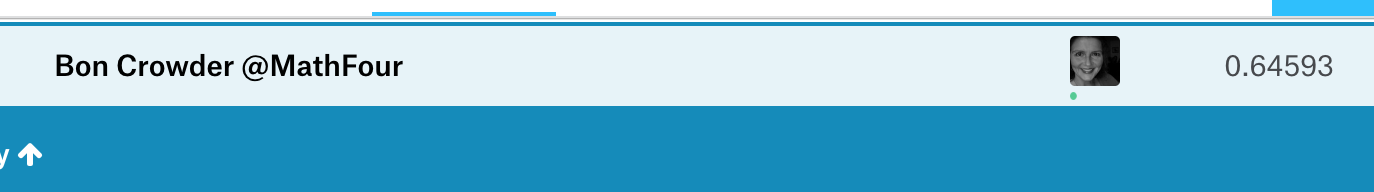

***
<a id='eda_viz'></a>

[jump back to the top](#top)